# Desafío - Expansiones basales

**Nombre alumno:** Julio Valdés

Profesor: Gabriel Tamayo L.

Generación: G5

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.


### Descripción

* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.
* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.
* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from pygam import LinearGAM
from pygam.utils import generate_X_grid

import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams["figure.figsize"] = (14, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 80 # resolución gráficos
sns.set_style('darkgrid')

df = pd.read_csv('compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [37]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Ejercicio 2: Descripción
* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals) .
* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc .
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [38]:
df.rename(columns = {
    df.columns[0]: 'Cement',
    df.columns[1]: 'Blast Furnace Slag',
    df.columns[2]: 'Fly Ash',
    df.columns[3]: 'Water',
    df.columns[4]: 'Superplasticizer',
    df.columns[5]: 'Coarse Aggregate',
    df.columns[6]: 'Fine Aggregate',
    df.columns[7]: 'Age',
    df.columns[8]: 'Concrete compressive strength'},
          inplace=True)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


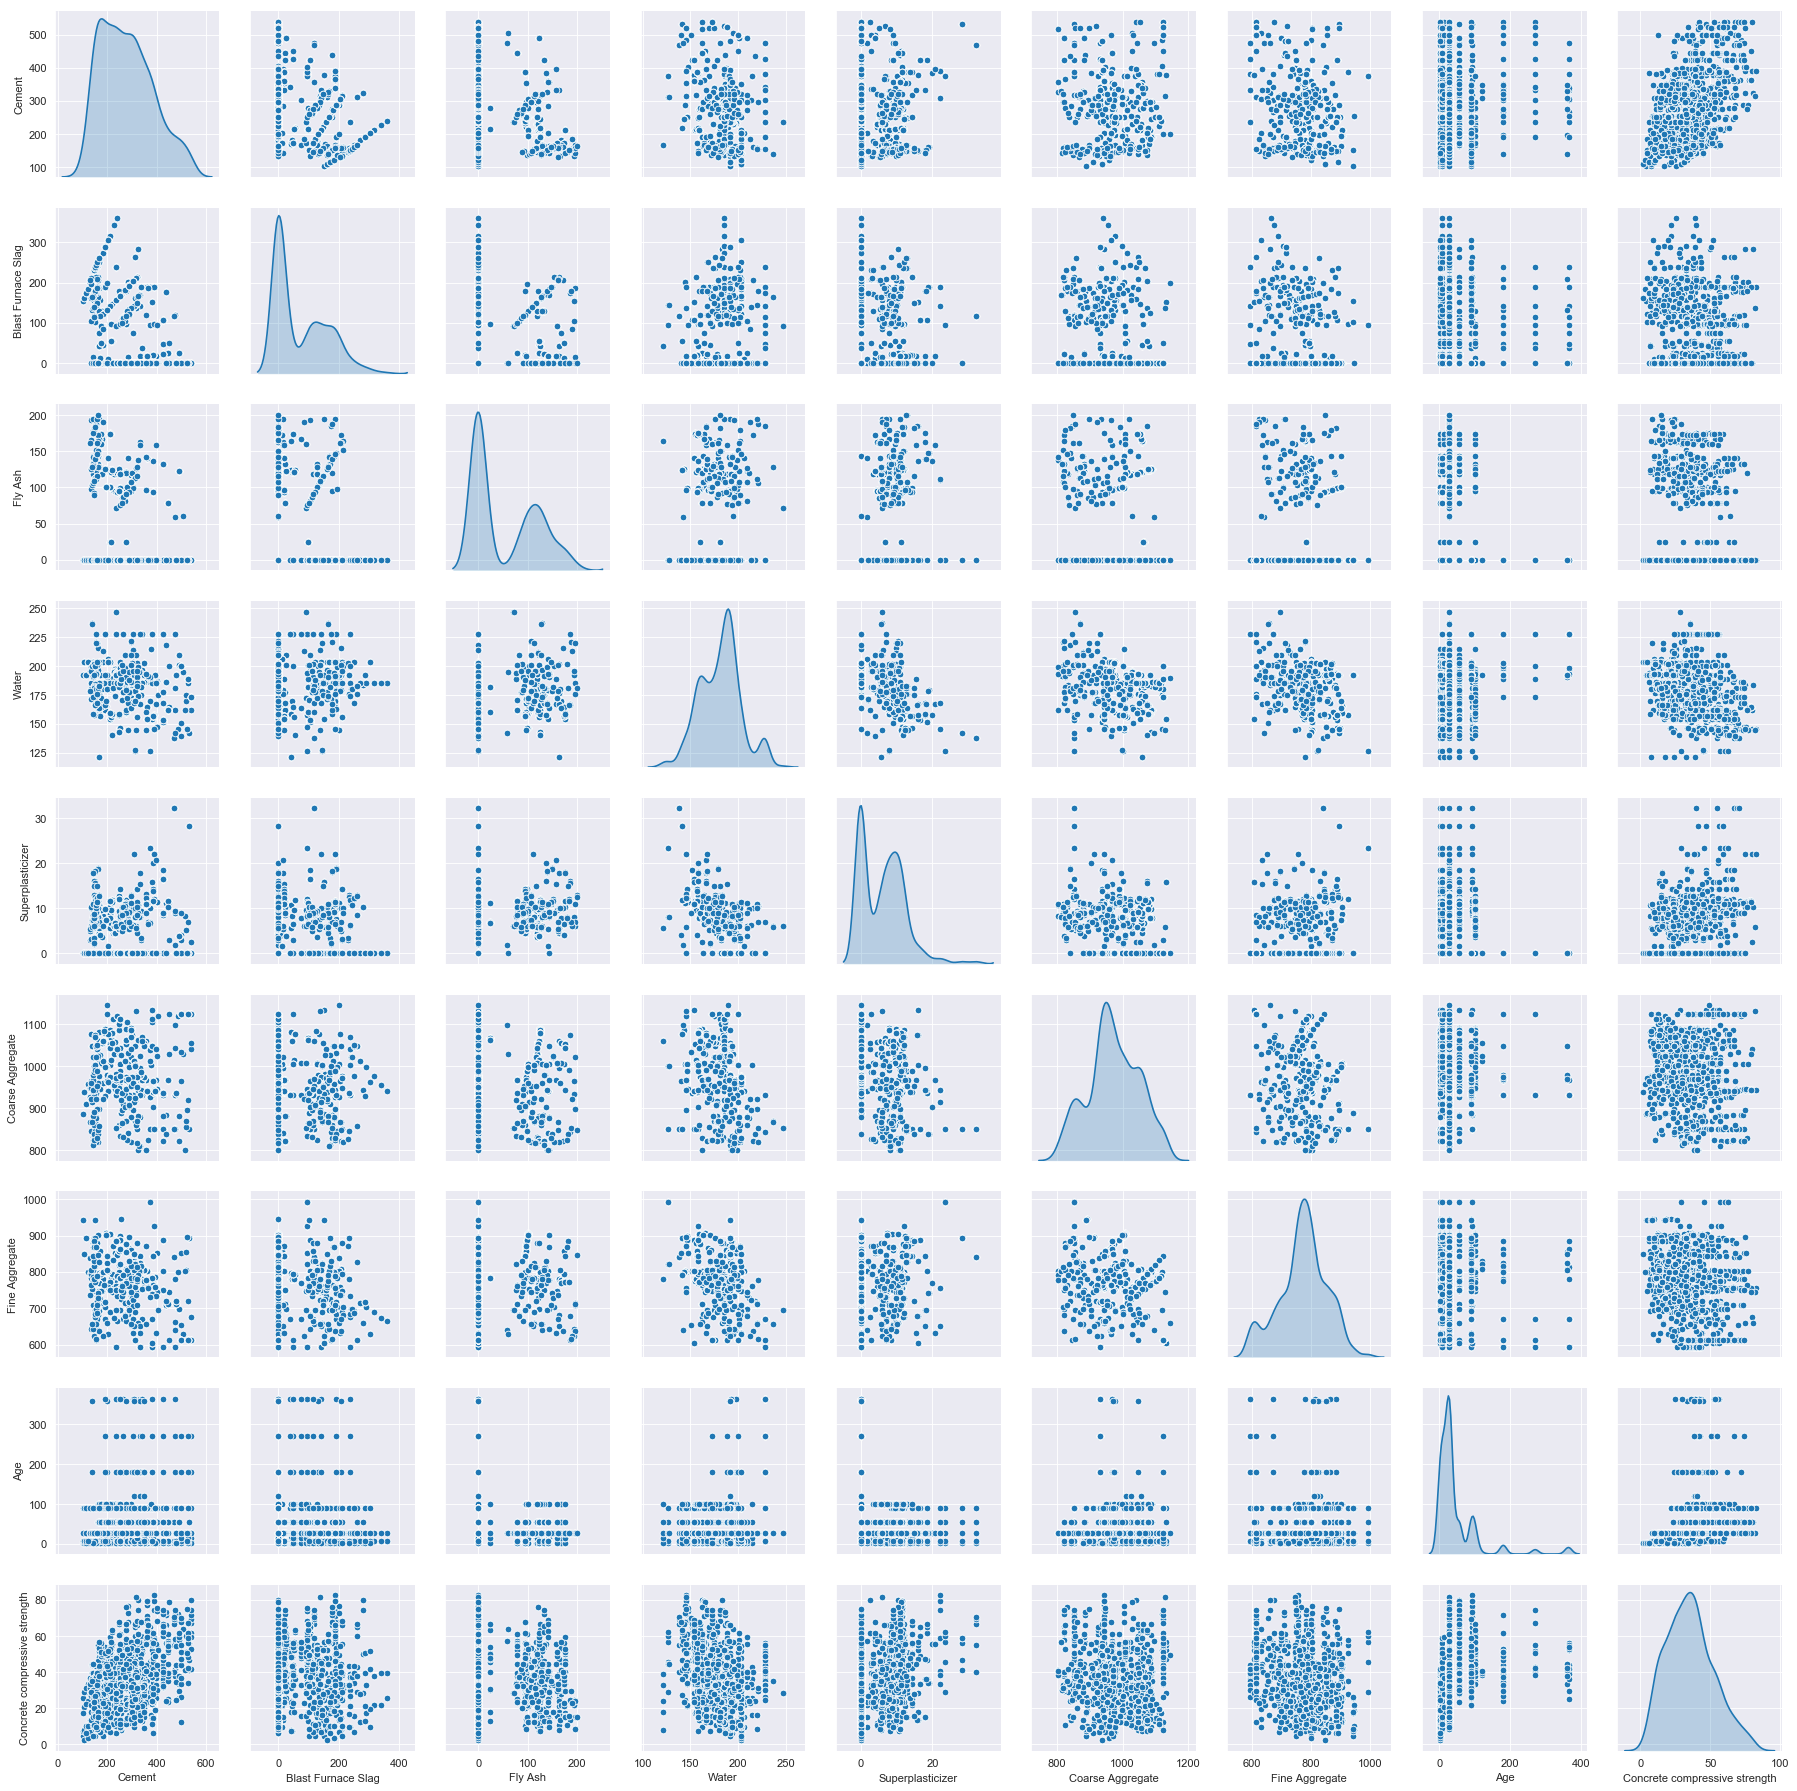

In [39]:
sns.pairplot(df, diag_kind="kde")

In [40]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


### Ejercicio 3: Modelo
* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam. Condicional a ésto, importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
* Genere un primer modelo sin implementar la función gridsearch. Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [41]:
X = df_scaled.loc[:, 'Cement':'Age']
N = X.shape[0]
y = df_scaled['Concrete compressive strength']
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = 63)

In [42]:
def report_gam_metrics(model, X_test, y_test):
    print('Test R^2 accuracy: {0}'.format(r2_score(y_test, model.predict(X_test)).round(3)))
    print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test, model.predict(X_test))).round(3)))
    print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test, model.predict(X_test)).round(3)))

#### Se genera el primer modelo sin implementar la función gridsearch

In [43]:
gam1 = LinearGAM().fit(X_train, y_train)
gam1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.3706
Link Function:                     IdentityLink Log Likelihood:                                 -2342.9406
Number of Samples:                          721 AIC:                                             4878.6224
                                                AICc:                                            4908.7161
                                                GCV:                                                0.1202
                                                Scale:                                               0.092
                                                Pseudo R-Squared:                                   0.9221
Feature Function   Data Type      Num

/Users/julio/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


#### Se genera el segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3

In [44]:
search_params = {'lam': np.logspace(-3, 3, 11)}
gam2 = LinearGAM().gridsearch(X_train, y_train, **search_params)
gam2.summary()

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/Users/julio/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01/Users/julio/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:01/Users/juli

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    107.5145
Link Function:                     IdentityLink Log Likelihood:                                 -2374.4345
Number of Samples:                          721 AIC:                                              4965.898
                                                AICc:                                             5004.767
                                                GCV:                                                0.1205
                                                Scale:                                              0.0887
                                                Pseudo R-Squared:                                   0.9264
Feature Function   Data Type      Num

In [45]:
report_gam_metrics(gam1, X_test, y_test)

Test R^2 accuracy: 0.897
Test RMSE accuracy: 0.311
Test MAE accuracy: 0.216


In [46]:
report_gam_metrics(gam2, X_test, y_test)

Test R^2 accuracy: 0.898
Test RMSE accuracy: 0.31
Test MAE accuracy: 0.209


### Ejercicio 4: Dependencia Parcial
* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de resistencia.

In [47]:
def dependencia_parcial(model):
    x_grid = generate_X_grid(model)
    attribute = X_train.columns
    cols = 4; rows = np.ceil(len(attribute) / cols)
    for i, n in enumerate(range(len(attribute))):
        plt.subplot(rows, cols, i + 1)
        partial_dep, confidence_intervals = model.partial_dependence(x_grid, feature = i + 1, width=.95)
        plt.plot(x_grid[:, n], partial_dep, color='dodgerblue')
        plt.fill_between(x_grid[:, n], confidence_intervals[0][:, 0], confidence_intervals[0][:, 1], color='dodgerblue', alpha=.25)
        plt.title(attribute[n])
        plt.plot(X_train[attribute[n]], [plt.ylim()[0]] * len(X_train[attribute[n]]), '|', color='orange', alpha=.5)
        
    plt.tight_layout()

/Users/julio/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


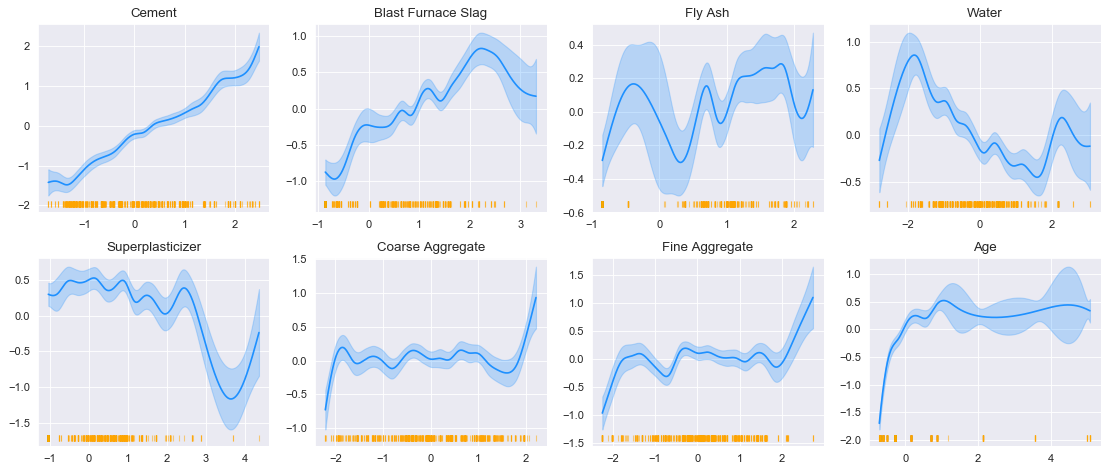

In [48]:
dependencia_parcial(gam2)

#### Comentarios
* Se observa que la variable Cement está fuertemente relacionada de manera lineal a Concrete compressive strength.
* Tanto la variable Coarse Aggregate como la variable Fine Aggregate presentan dependencias parciales similares con respecto a Concrete compressive strength, pasando por un intervalo en el que se mantiene estable y luego comienza a crecer de forma pronunciada.
* La variable Age presenta un comportamiento creciente hasta que llega a un valor a partir del cual se mantiene estable la relación con Concrete compressive strength.